In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [46]:
cr_data = pd.read_csv("winequality-white.csv",sep=';')
ncr_data = pd.read_csv("winequality-white.csv",sep=';')

print(cr_data.head())
print(ncr_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [36]:
print(data.shape)
data.info()

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [37]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [38]:
print(data.shape)
data.head()



(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
cr_data.drop('free sulfur dioxide',axis=1,inplace=True)
cr_data.drop('citric acid',axis=1,inplace=True)
cr_data.shape

(4898, 10)

In [48]:
ncr_data.shape

(4898, 12)

In [49]:
#non - correlation
quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
ncr_data = pd.concat([ncr_data, category], axis=1)

ncr_data.drop(columns="quality", axis=1, inplace=True)

ncr_X = ncr_data.drop('category',axis=1)

ncr_y = ncr_data['category']

#for correlation

quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
cr_data = pd.concat([cr_data, category], axis=1)
cr_data.drop(columns="quality", axis=1, inplace=True)

cr_X = cr_data.drop('category',axis=1)

cr_y = cr_data['category']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18c56dd8>]],
      dtype=object)

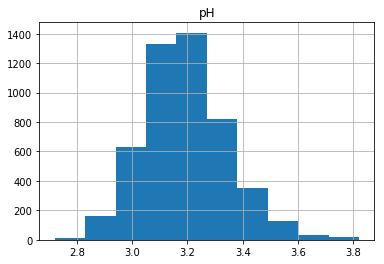

In [50]:
ncr_data.hist('pH')

In [51]:
ncr_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [52]:
ncr_X.shape

(4898, 11)

In [53]:
cr_X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9


In [55]:
cr_y.shape

(4898,)

In [56]:
from sklearn.model_selection import train_test_split  
ncr_X_train, ncr_X_test, ncr_y_train, ncr_y_test = train_test_split(ncr_X, ncr_y, test_size = 0.20)  

cr_X_train, cr_X_test, cr_y_train, cr_y_test = train_test_split(cr_X, cr_y, test_size = 0.20)  


In [58]:
print(cr_X_train.shape,cr_X_test.shape,cr_y_train.shape)
print(ncr_X_train.shape,ncr_X_test.shape,ncr_y_train.shape)


(3918, 9) (980, 9) (3918,)
(3918, 11) (980, 11) (3918,)


In [64]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(ncr_X_train, ncr_y_train)
ncr_y_pred = svclassifier.predict(ncr_X_test)
print("SVM - linear:")
print(accuracy_score(ncr_y_test,ncr_y_pred))


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier.fit(ncr_X_train, ncr_y_train)
ncr_y_pred = svclassifier.predict(ncr_X_test)
print("SVM - rbf:")
print(accuracy_score(ncr_y_test,ncr_y_pred))

SVM - linear:
0.75
SVM - rbf:
0.7846938775510204


In [61]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - linear:")
print(accuracy_score(cr_y_test,cr_y_pred))


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - rbf:")

print(accuracy_score(cr_y_test,cr_y_pred))

SVM - linear:
0.7581632653061224
SVM - rbf:
0.7755102040816326


In [63]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(ncr_X_train, ncr_y_train)
ncr_y_pred = svclassifier.predict(ncr_X_test)
print("SVM - rbf:")
print(accuracy_score(ncr_y_test,ncr_y_pred))

svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - sigmoid:")
print(accuracy_score(cr_y_test,cr_y_pred))

SVM - rbf:
0.75
SVM - sigmoid:
0.7581632653061224


In [175]:
# applying standard scaler


In [66]:
from sklearn.preprocessing import StandardScaler

ncr_scaler = StandardScaler()
ncr_scaler.fit(ncr_X_train)

ncr_X_train = ncr_scaler.transform(ncr_X_train)  
ncr_X_test = ncr_scaler.transform(ncr_X_test)


cr_scaler = StandardScaler()
cr_scaler.fit(cr_X_train)


cr_X_train = cr_scaler.transform(cr_X_train)  
cr_X_test = cr_scaler.transform(cr_X_test)

In [ ]:
#after standardization

In [67]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(ncr_X_train, ncr_y_train)
ncr_y_pred = svclassifier.predict(ncr_X_test)
print("SVM - linear:")
print(accuracy_score(ncr_y_test,ncr_y_pred))


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier.fit(ncr_X_train, ncr_y_train)
ncr_y_pred = svclassifier.predict(ncr_X_test)
print("SVM - rbf:")
print(accuracy_score(ncr_y_test,ncr_y_pred))

SVM - linear:
0.75
SVM - rbf:
0.786734693877551


In [68]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - linear:")
print(accuracy_score(cr_y_test,cr_y_pred))


from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - rbf:")

print(accuracy_score(cr_y_test,cr_y_pred))

SVM - linear:
0.7581632653061224
SVM - rbf:
0.810204081632653


In [70]:

svclassifier = SVC(kernel='rbf')
svclassifier.fit(cr_X_train, cr_y_train)
cr_y_pred = svclassifier.predict(cr_X_test)
print("SVM - rbf:")
print(accuracy_score(cr_y_test,cr_y_pred))

SVM - rbf:
0.810204081632653


In [ ]:
# KNN

In [81]:
#ncr
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=8)  
classifier.fit(ncr_X_train, ncr_y_train)  
ncr_y_pred = classifier.predict(ncr_X_test)  
print('Accuracy - KNN - Non correlation')
print(accuracy_score(ncr_y_test,ncr_y_pred))

#cr
print('Accuracy - KNN - After removing Correlated features')
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(cr_X_train, cr_y_train)  
cr_y_pred = classifier.predict(cr_X_test)  
print(accuracy_score(cr_y_test,cr_y_pred))


Accuracy - KNN - Non correlation
0.7744897959183673
Accuracy - KNN - After removing Correlated features
0.8193877551020409


Text(0,0.5,'Mean Error')

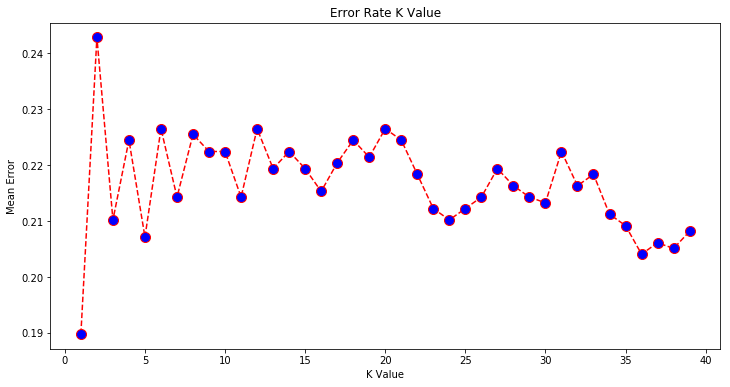

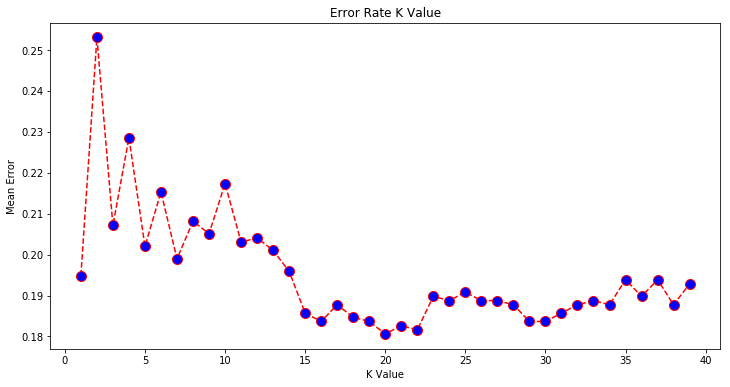

In [82]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(ncr_X_train, ncr_y_train)
    pred_i = knn.predict(ncr_X_test)
    error.append(np.mean(pred_i != ncr_y_test))

    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

error = []


for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(cr_X_train, cr_y_train)
    pred_i = knn.predict(cr_X_test)
    error.append(np.mean(pred_i != cr_y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

### So at k value 20, we get an optimal error rate.

## Tried to be greedy, never mind

Text(0,0.5,'Mean Error')

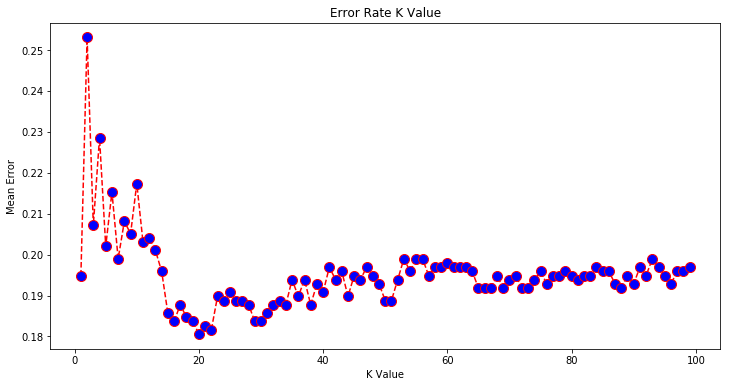

In [86]:
error = []
for i in range(1, 100):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(cr_X_train, cr_y_train)
    pred_i = knn.predict(cr_X_test)
    error.append(np.mean(pred_i != cr_y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 